In [122]:
import csv
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation

# Import and Prepare Data

In [161]:
# read train.csv and prepare train/test data set out of it
X = pd.read_csv("./train.csv")
X.pop('id') # drop id

# extract integer encoded label from species
species = X.pop('species')
le = LabelEncoder().fit(species)
lables = le.transform(species)

# keep class name for submission
classes = list(le.classes_)

# standarize data
X = StandardScaler().fit(X).transform(X)

X.shape

(990, 192)

# Model - Simple multi-layer neural network

construct neural network by stacking up flat layzers in sequential manner.
label should be encoded into categorical variables, i.e, one-hot encoding


In [162]:
y = to_categorical(labels)
y.shape

(990, 99)

In [163]:
model = Sequential()
model.add(Dense(2048,input_dim=192,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(99,activation='softmax'))

In [164]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [165]:
history = model.fit(X, y, nb_epoch=150, batch_size=128,verbose=0, validation_split=0.2)

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])
acc:  1.0
loss:  1.19359806331e-07
val_acc:  1.0
val_loss:  0.0129312894147


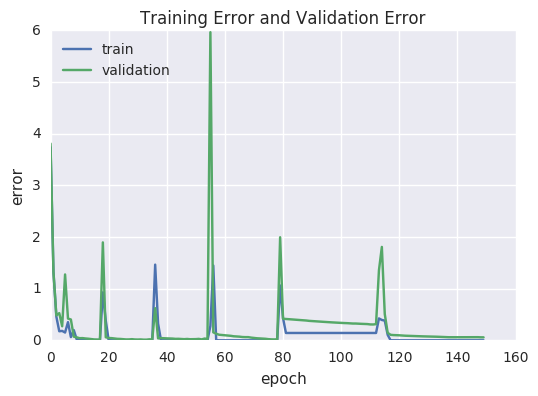

In [167]:
# Plot history of model fit
print(history.history.keys())
print('acc: ',max(history.history['acc']))
print('loss: ',min(history.history['loss']))
print('val_acc: ',max(history.history['val_acc']))
print('val_loss: ',min(history.history['val_loss']))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Error and Validation Error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Read test data for prediction, and submit those predictions


In [169]:
# read test file
test = pd.read_csv('./test.csv')
test_ids = test.pop('id')

# standarize 
test = StandardScaler().fit(test).transform(test)

test_predictions = model.predict_proba(test)

# prepare submission format
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

# output
submission.to_csv('submission.csv', index = False)


594/594 [==============================] - 0s     
